In [70]:
# Import Libraries
import pandas as pd                                     # Importing the pandas library for data manipulation
import numpy as np                                      # Importing numpy for numerical operations
import seaborn as sns                                   # Importing seaborn for data visualization
import matplotlib.pyplot as plt                         # Importing matplotlib for plotting
from sklearn.tree import DecisionTreeClassifier         # Importing the DecisionTreeClassifier from scikit-learn
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, confusion_matrix  # Importing various evaluation metrics
from sklearn.model_selection import train_test_split    # Importing train_test_split for splitting data
from sklearn.linear_model import LinearRegression       # Importing LinearRegression model from scikit-learn

# INFO: PLEASE ADD Irist.csv file in sample_data folter first
iris = pd.read_csv("sample_data/Iris.csv")              # Loading the Iris dataset from a CSV file

In [71]:
iris.head()                                             # display the first few rows of the "iris" DataFrame

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [72]:
print("Shape of Iris Dataset: ",iris.shape)             #Printing dimensions of Iris Dataset

Shape of Iris Dataset:  (150, 6)


In [73]:
print("Basic Statistics:")
print(iris.describe())                                  # obtain summary statistics for each numeric column

Basic Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [74]:
class_stats = iris.groupby("Species").agg(["mean", "median", "std"])  # Mean, median, and standard deviation by class
print("\nStatistics by Class:")
print(class_stats)


Statistics by Class:
                    Id                  SepalLengthCm                   \
                  mean median       std          mean median       std   
Species                                                                  
Iris-setosa       25.5   25.5  14.57738         5.006    5.0  0.352490   
Iris-versicolor   75.5   75.5  14.57738         5.936    5.9  0.516171   
Iris-virginica   125.5  125.5  14.57738         6.588    6.5  0.635880   

                SepalWidthCm                  PetalLengthCm                   \
                        mean median       std          mean median       std   
Species                                                                        
Iris-setosa            3.418    3.4  0.381024         1.464   1.50  0.173511   
Iris-versicolor        2.770    2.8  0.313798         4.260   4.35  0.469911   
Iris-virginica         2.974    3.0  0.322497         5.552   5.55  0.551895   

                PetalWidthCm                   
    

Text(0.5, 1.0, 'Petal Width Distribution')

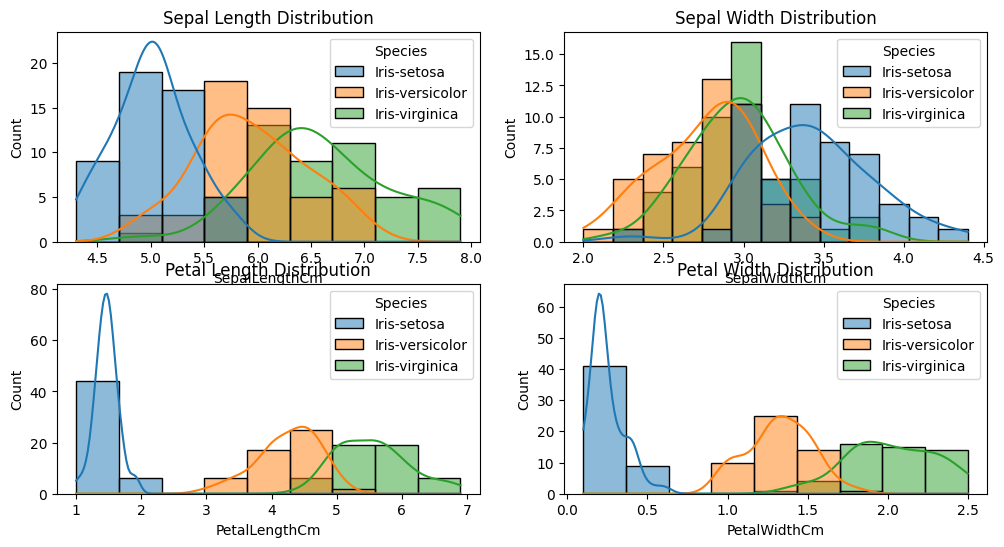

In [76]:
# Histograms : Create a figure and set the figure size
plt.figure(figsize=(12, 6))

# Create subplot 1 (top-left)
plt.subplot(2, 2, 1)
# Create a histogram with KDE (Kernel Density Estimate) for Sepal Length, colored by species
sns.histplot(data=iris, x="SepalLengthCm", hue="Species", kde=True)
# Set the title for this subplot
plt.title("Sepal Length Distribution")

# Create subplot 2 (top-right)
plt.subplot(2, 2, 2)
# Create a histogram with KDE for Sepal Width, colored by species
sns.histplot(data=iris, x="SepalWidthCm", hue="Species", kde=True)
# Set the title for this subplot
plt.title("Sepal Width Distribution")

# Create subplot 3 (bottom-left)
plt.subplot(2, 2, 3)
# Create a histogram with KDE for Petal Length, colored by species
sns.histplot(data=iris, x="PetalLengthCm", hue="Species", kde=True)
# Set the title for this subplot
plt.title("Petal Length Distribution")

# Create subplot 4 (bottom-right)
plt.subplot(2, 2, 4)
# Create a histogram with KDE for Petal Width, colored by species
sns.histplot(data=iris, x="PetalWidthCm", hue="Species", kde=True)
# Set the title for this subplot
plt.title("Petal Width Distribution")

In [77]:
# Check for missing values
missing_values = iris.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [78]:
from sklearn.preprocessing import LabelEncoder          # Import the LabelEncoder class from scikit-learn

# Encode the "Species" column, After running this code, the 'Species' column in the iris DataFrame will be replaced with numeric values
label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [79]:
# Split the data into features (X) and target (y)
X = iris.drop('Species', axis=1)
y = iris['Species']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report for detailed metrics
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
#class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [59]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Mean Root Squared Error: 0.0


In [60]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

array([ 1.13743644e+00, -5.72637294e-02,  2.12083954e+00,  1.24546183e+00,
        1.21458640e+00,  7.06285833e-02,  9.54219014e-01,  2.02065510e+00,
        1.19713338e+00,  1.09652194e+00,  1.70584393e+00, -1.42065228e-01,
       -1.34934635e-03, -1.57002021e-01, -5.62398315e-02,  1.12143714e+00,
        1.84770422e+00,  9.85716206e-01,  1.02772428e+00,  2.03207830e+00,
        4.04460924e-02,  1.75441915e+00,  6.62164896e-02,  1.96887608e+00,
        1.97197718e+00,  2.07752016e+00,  1.75369256e+00,  2.15716447e+00,
        1.64540452e-01,  4.81354446e-02])

In [62]:
y_pred = lr.predict(X_test)

In [63]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11033326246741239
Mean Squared Error: 0.018735923663819754
Mean Root Squared Error: 0.13687923021342482


In [ ]:
# This code demonstrates a comprehensive data analysis and machine learning workflow. Initially, it imports necessary libraries and loads the Iris dataset,
# followed by data exploration and visualization steps, including checking for missing values, calculating basic statistics,
# and visualizing data distributions through histograms. The code then encodes categorical labels using LabelEncoder, an essential preprocessing step for machine learning.
# Next, the data is split into training and testing sets to enable model evaluation. The code builds a Decision Tree Classifier to classify iris species, calculates model
# accuracy, and generates a classification report with detailed metrics. Furthermore, a Linear Regression model is applied for numeric predictions, and its performance is
# evaluated using metrics like Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.